# Color Threshold, Green Screen

### Import resources

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [32]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)


Image dimensions: (450, 660, 3)


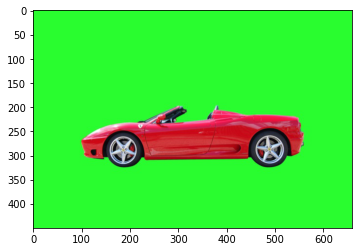

In [33]:
# Display the image
plt.imshow(image)

### Define the color threshold

In [34]:
## TODO: Define our color selection boundaries in RGB values
lower_green = np.array([0,220,0]) 
upper_green = np.array([240,255,240])


### Create a mask

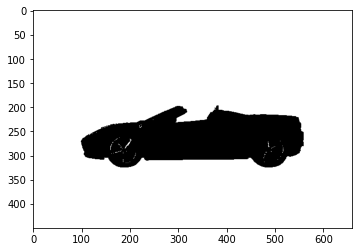

In [35]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

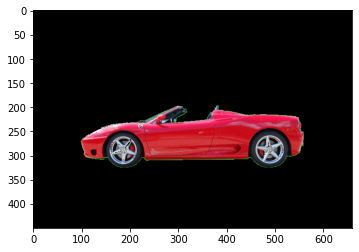

In [36]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


### Mask and add a background image

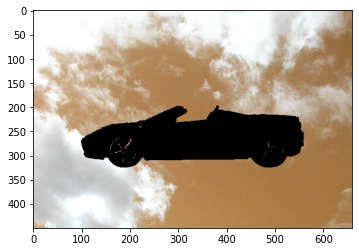

In [37]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
## TODO: Crop it or resize the background to be the right size (450x660)
cropped_image = background_image[0:450, 0:660]
## TODO: Mask the cropped background so that the car area is blocked
# Hint mask the opposite area of the previous image
cropped_image[mask == 0] = [0, 0, 0]
## TODO: Display the background and make sure 
plt.imshow(cropped_image)

### Create a complete image

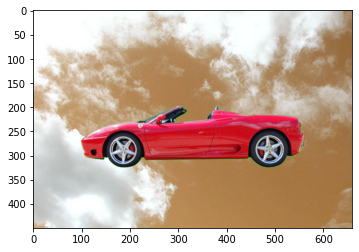

In [39]:
## TODO: Add the two images together to create a complete image!
# complete_image = masked_image + crop_background

complete_image = masked_image + cropped_image
plt.imshow(complete_image)